In [32]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [33]:
df = pd.read_csv('SentimentAnalysis.csv')

In [34]:
# NLTK splits the Reddit titles into separate sentences
import nltk

In [35]:
# List to hold the sentences
s_list = []
# List to hold the IDs. Keeps track of individual posts, just in case it's needed later
id_list = []

for index, title in enumerate(df['title']):
    id = df.loc[index, 'id']
    a_list = nltk.tokenize.sent_tokenize(title)
    for sentence in a_list:
        id_list.append(id)
        s_list.append(sentence)

In [37]:
# https://pypi.org/project/NRCLex/
# NCRLex uses a 27,000 word library to predict emotions of the sentences

from nrclex import NRCLex

In [38]:
# Create a list to hold the NRCLex objects
emotions = []

# Create NRCLex objects out of each sentence
for sentence in s_list:
    emo = NRCLex(sentence)
    emotions.append(emo)

In [39]:
# NRCLex determined that some of the results were completely neutral
# To clean out the results from neutral results, create a new list
# This is done by adding the values for each emotion, and if >0, add to new list
emo2 = []

for i in emotions:
    val = 0
    for key in i.affect_frequencies:
        val += i.affect_frequencies[key]
#     if (val != 0):
#         emo2.append(i)
    emo2.append(i)

In [40]:
for sentence in emo2:
    if 'anticip' in sentence.affect_frequencies:
        del sentence.affect_frequencies['anticip']
    if 'positive' in sentence.affect_frequencies:
        del sentence.affect_frequencies['positive']
    if 'negative' in sentence.affect_frequencies:
        del sentence.affect_frequencies['negative']

In [42]:
# https://github.com/alfonsosemeraro/pyplutchik
# Visualization tool based on Plutchik's Model of Emotions (flower)

from pyplutchik import plutchik

In [43]:
# Averaging out the average emotional value across all posts

# Stores to total number of posts
count = 0

# First used to store the total value of each emotional value
# Then calculate the 
avg_joy = 0.0
avg_trust = 0.0
avg_fear = 0.0
avg_supr = 0.0
avg_sad = 0.0
avg_disg = 0.0
avg_ang = 0.0
avg_ant = 0.0

In [44]:
for sentence in emo2:
    count += 1
    for key in sentence.affect_frequencies:
        if key == 'joy':
            avg_joy += sentence.affect_frequencies[key]
        elif key == 'trust':
            avg_trust += sentence.affect_frequencies[key]
        elif key == 'fear':
            avg_fear += sentence.affect_frequencies[key]
        elif key == 'surpise':
            avg_supr += sentence.affect_frequencies[key]
        elif key == 'sadness':
            avg_sad += sentence.affect_frequencies[key]
        elif key == 'disgust':
            avg_disg += sentence.affect_frequencies[key]
        elif key == 'anger':
            avg_ang += sentence.affect_frequencies[key]
        elif key == 'anticipation':
            avg_ant += sentence.affect_frequencies[key]
            
test = {'joy': avg_joy/count,
            'trust': avg_trust/count,
            'fear': avg_fear/count,
            'surprise': avg_supr/count,
            'sadness': avg_sad/count,
            'disgust': avg_disg/count,
            'anger': avg_ang/count,
            'anticipation': avg_ant/count}

C:\Users\guest1\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

C:\Users\guest1\anaconda3\lib\site-packages\pyplutchik\pyplutchik.py:770: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.

C:\Users\guest1\anaconda3\lib\site-packages\pyplutchik\pyplutchik.py:775: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



<AxesSubplot:>

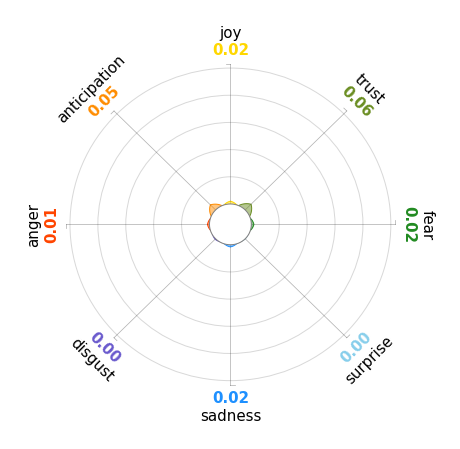

In [45]:
plutchik(test)

In [46]:
total_perc = 0.0

for key in test:
    total_perc += test[key]

print(total_perc)

test2 = {'joy': (avg_joy/count)/total_perc,
            'trust': (avg_trust/count)/total_perc,
            'fear': (avg_fear/count)/total_perc,
            'surprise': (avg_supr/count)/total_perc,
            'sadness': (avg_sad/count)/total_perc,
            'disgust': (avg_disg/count)/total_perc,
            'anger': (avg_ang/count)/total_perc,
            'anticipation': (avg_ant/count)/total_perc}

0.18601075061308575


<AxesSubplot:>

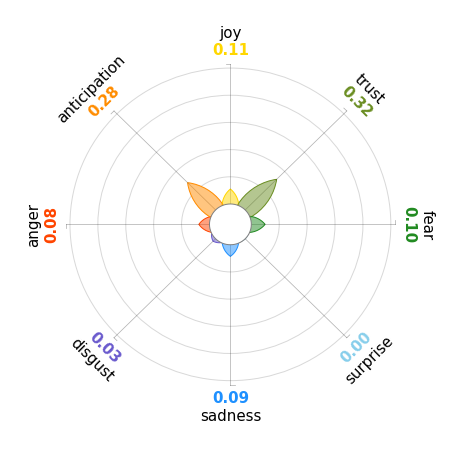

In [47]:
plutchik(test2)

In [49]:
# Average measure of intensity of emotion
avg_joy = 0.0
avg_trust = 0.0
avg_fear = 0.0
avg_supr = 0.0
avg_sad = 0.0
avg_disg = 0.0
avg_ang = 0.0
avg_ant = 0.0

joyct = 0
trustct = 0
fearct = 0
suprct = 0
sadct = 0
disgct = 0
angct = 0
antct = 0

In [50]:
for sentence in emo2:
    count += 1
    for key in sentence.affect_frequencies:
        if key == 'joy' and sentence.affect_frequencies['joy'] != 0.0:
            joyct += 1
            avg_joy += sentence.affect_frequencies[key]
        elif key == 'trust'and sentence.affect_frequencies['trust'] != 0.0:
            avg_trust += sentence.affect_frequencies[key]
            trustct += 1
        elif key == 'fear'and sentence.affect_frequencies['fear'] != 0.0:
            avg_fear += sentence.affect_frequencies[key]
            fearct += 1
        elif key == 'surpise'and sentence.affect_frequencies['surpise'] != 0.0:
            avg_supr += sentence.affect_frequencies[key]
            suprct += 1
        elif key == 'sadness'and sentence.affect_frequencies['sadness'] != 0.0:
            avg_sad += sentence.affect_frequencies[key]
            sadct += 1
        elif key == 'disgust'and sentence.affect_frequencies['disgust'] != 0.0:
            avg_disg += sentence.affect_frequencies[key]
            disgct += 1
        elif key == 'anger'and sentence.affect_frequencies['anger'] != 0.0:
            avg_ang += sentence.affect_frequencies[key]
            angct += 1
        elif key == 'anticipation'and sentence.affect_frequencies['anticipation'] != 0.0:
            avg_ant += sentence.affect_frequencies[key]
            antct += 1

test = {'joy': avg_joy/joyct,
            'trust': avg_trust/trustct,
            'fear': avg_fear/fearct,
            'surprise': avg_supr,
            'sadness': avg_sad/sadct,
            'disgust': avg_disg/disgct,
            'anger': avg_ang/angct,
            'anticipation': avg_ant/antct}

<AxesSubplot:>

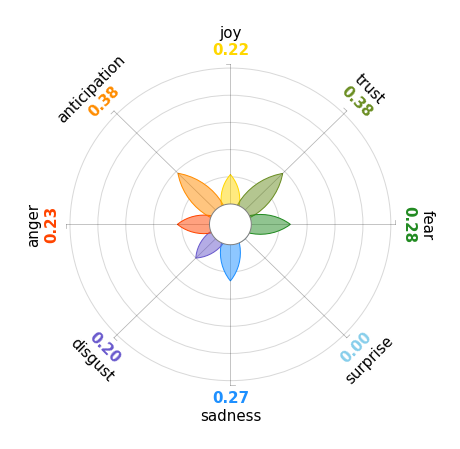

In [51]:
plutchik(test)

In [ ]:
# text2emotion Emotion Analysis

# pip install text2emotion
# https://colab.research.google.com/drive/1sCAcIGk2q9dL8dpFYddnsUin2MlhjaRw?usp=sharing#scrollTo=D3QHLMdnbMCX

import text2emotion as te

In [10]:
angry = []
fear = []
happy = []
sad = []
surpise = []

for i in s_list:
    elist = te.get_emotion(i)
    angry.append(elist["Angry"])
    fear.append(elist["Fear"])
    happy.append(elist["Happy"])
    sad.append(elist["Sad"])
    surpise.append(elist["Surprise"])

In [13]:
emolist = pd.DataFrame(s_list, columns = ['Sentence'])

In [14]:
emolist["Angry"] = angry
emolist["Fear"] = fear
emolist["Happy"] = happy
emolist["Sad"] = sad
emolist["Surprise"] = surpise

In [16]:
emolist.to_csv("text2emotionEmoList.csv")

In [17]:
import plotly.express as px 
import pandas as pd 
import numpy as np 

In [21]:
ang_tot = emolist["Angry"].sum()
fear_tot = emolist["Fear"].sum()
happ_tot = emolist["Happy"].sum()
sad_tot = emolist["Sad"].sum()
surprise_tot = emolist["Surprise"].sum()

total = ang_tot + fear_tot + happ_tot + sad_tot + surprise_tot

In [20]:
print(ang_tot)

284.37


In [22]:
val = [ang_tot, fear_tot, happ_tot, sad_tot, surprise_tot]
names = ["Angry", "Fear", "Happy", "Sad", "Surpise"]

In [30]:
fig = px.pie(values=val, names=names, title="Emotions(text2emotion) in /r/Bitcoin (November 2021)", color_discrete_sequence=px.colors.sequential.RdBu)

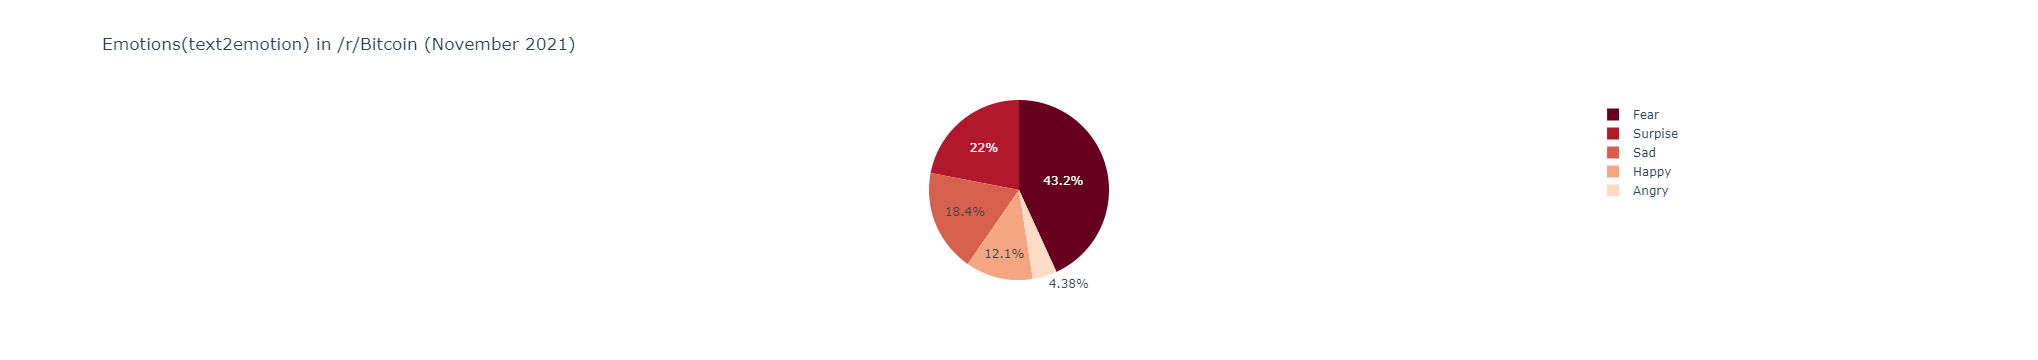

In [31]:
fig.show()